In [101]:
import sys
sys.path.insert(0, '../src/data')
import pandas as pd
import geopandas as gpd
import requests
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [98]:
import bame_datastore

bame_datastore.lib

Found local clean copy of ethnicity_2011
Found local clean copy of Local_Authority_Districts__December_2009__Boundaries
Found local clean copy of fbook_covid_deaths
Found local clean copy of BAME_report_cases
Found local clean copy of BAME_report_deaths
Found local clean copy of bame_excess_deaths
Found local clean copy of ons_deaths


{'mortality': ['fbook_covid_data',
  'bame_rpt_deaths',
  'bame_rpt_excess_deaths',
  'ons_deaths'],
 'explanatory': ['ethnicity_data', 'bame_rpt_cases'],
 'other': ['lad_geog']}

In [181]:
ons_deaths_df = bame_datastore.ons_deaths.df.set_index("Area name")
ethnicity_df = bame_datastore.ethnicity_data.df.set_index("Geography_name")
df = ons_deaths_df.join(ethnicity_df) # join the deaths and ethnicity data by local authority
df.dropna(subset=["Denominator"], inplace=True)


In [182]:
def reg_plot(df, cov_death_col):
    """Takes in DataFrame and name of covid death column"""
    fig, ax = plt.subplots(figsize=(20,10))

    corr_capture = {}
    for i in df.columns[13:36]: #itterate throught the ethnicities
        correlation = df[cov_death_col].corr(df[i])
        corr_capture[i] = correlation

        ax = sns.regplot(x=i, y=cov_death_col, data=df, label=i)

    ax.legend()
    plt.legend(loc='upper right')
    ax.set_title(f'Relationship between {cov_death_col} and ethnicity broken down by Local Authority District')
    ax.set_xlabel('% of local population in this ethnic group - 2011 Census')
    ax.set_ylabel('number of deaths in the local authority district')

    plt.savefig(f"../reports/figures/regplot{cov_death_col}.png")

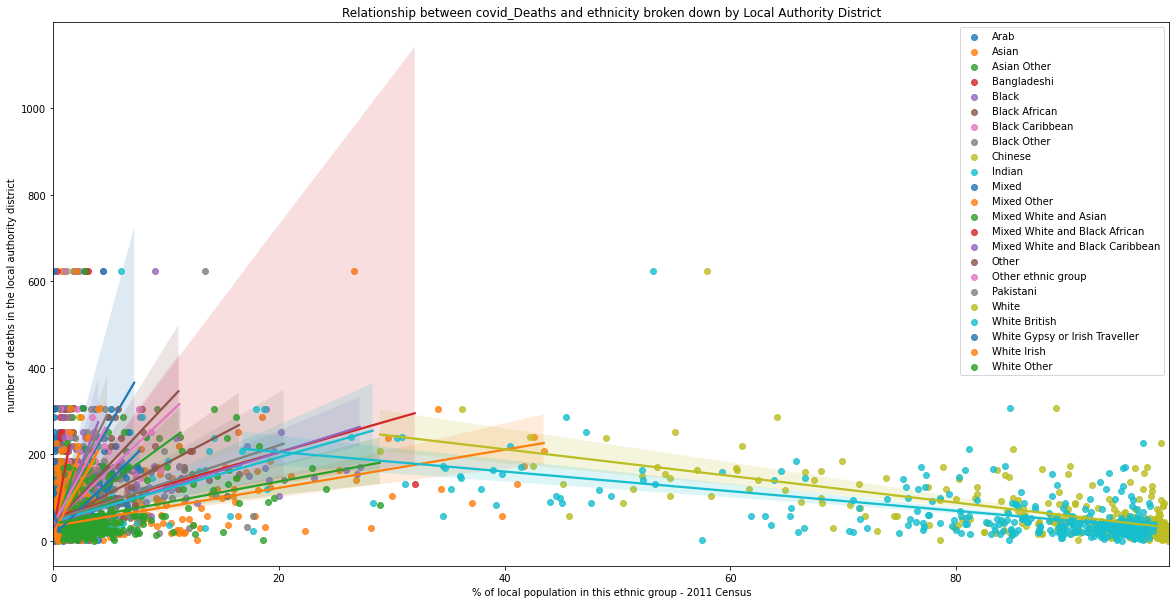

In [183]:
reg_plot(df, "covid_Deaths")


In [184]:
df["total"] = df[df.columns[13:36]].sum(axis=1) #why is this 200??
df["bame"] = df[df.columns[13:31]].sum(axis=1)



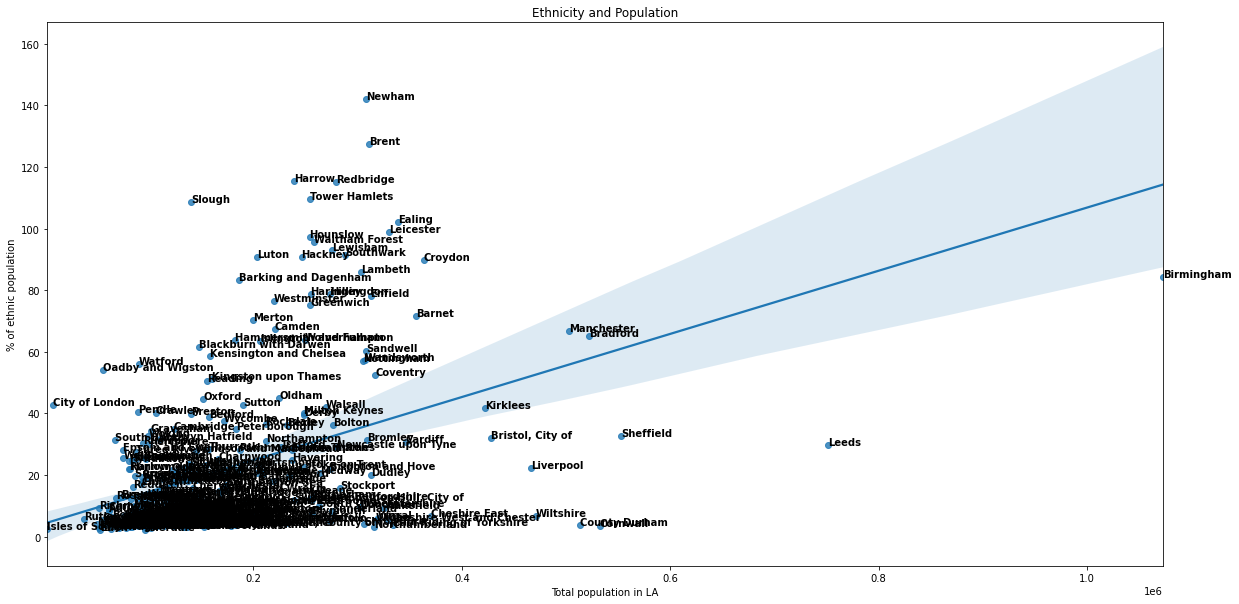

In [185]:
fig, ax = plt.subplots(figsize=(20,10))
ax = sns.regplot(x="Denominator", y="bame", data=df, label=i) #desnity and bame

for line in range(0,df.shape[0]):
     ax.text(df.Denominator[line]+0.2, df.bame[line], df.index[line], horizontalalignment='left', size='medium', color='black', weight='semibold')
        
ax.set_title(f'Ethnicity and Population')
ax.set_xlabel("Total population in LA")
ax.set_ylabel('% of ethnic population')
plt.savefig(f"../reports/figures/ethnicity_and_density.png")

In [190]:
df.sort_values(by=["covid_Deaths"], ascending=False)

,Sex,Geography,Area code,all_Deaths,all_Rate,all Lower CI,all Upper CI,covid_Deaths,covid_Rate,covid Lower CI,...,Other,Other ethnic group,Pakistani,White,White British,White Gypsy or Irish Traveller,White Irish,White Other,total,bame
Birmingham,Persons,Metropolitan District,E08000025,1789,220.1,209.8,230.3,624,77.5,71.4,...,2.03,1.02,13.48,57.93,53.14,0.04,2.05,2.70,199.99,84.13
Liverpool,Persons,Metropolitan District,E08000012,905,242.2,226.3,258.2,308,81.8,72.6,...,1.77,0.57,0.43,88.91,84.79,0.04,1.44,2.63,199.99,22.18
Brent,Persons,London Borough,E09000005,550,256.9,235.1,278.6,304,141.5,125.4,...,5.77,2.09,4.62,36.27,17.96,0.10,3.96,14.25,200.00,127.46
Barnet,Persons,London Borough,E09000003,687,216.9,200.5,233.2,287,91.6,80.9,...,4.86,3.40,1.50,64.13,45.49,0.04,2.44,16.16,199.99,71.73
Croydon,Persons,London Borough,E09000008,573,201,184.4,217.6,252,88,77,...,1.76,1.29,2.99,55.09,47.26,0.06,1.48,6.29,200.01,89.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Rutland,Persons,Unitary Authority,E06000017,59,120.7,91.6,156,3,7.1,1.3,...,0.17,0.16,0.10,97.14,94.31,0.16,0.58,2.10,200.00,5.71
Norwich,Persons,Non-Metropolitan District,E07000148,160,137.8,116.3,159.4,3,2.5,0.5,...,0.84,0.35,0.19,90.84,84.70,0.10,0.66,5.39,200.02,18.33
City of London,Persons,London Borough,E09000001,9,106.2,48.4,201.8,3,35.2,7.2,...,2.09,1.15,0.22,78.63,57.53,0.04,2.44,18.62,200.03,42.77
Isle of Anglesey,Persons,Unitary Authority,W06000001,113,126.5,103.1,150,2,:,:,...,0.26,0.06,0.05,98.24,96.56,0.09,0.68,0.90,200.01,3.54
